We want to see which is faster: using operators (df.col1 + df.col2) or functions (df[[col1,col2]].sum()) when dealing with pandas dataframes.

In [7]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [8]:
df = pd.DataFrame({'col1':[2,3,4, np.nan], 'col2':[np.nan,2,4,10], 'col3':[5,4,np.nan,2]})
df

,col1,col2,col3
0,2.0,NaN,5.0
1,3.0,2.0,4.0
2,4.0,4.0,NaN
3,NaN,10.0,2.0


sum = df.col1.fillna(0) + df.col2.fillna(0) + df.col3.fillna(0)


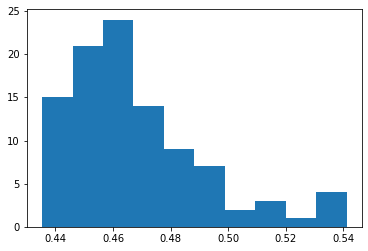

sum = df[df.columns].sum(axis=1)


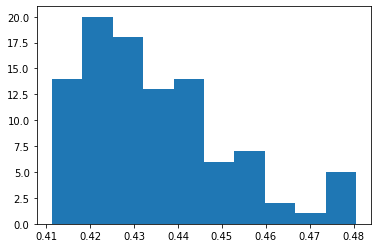

In [41]:
import timeit

setup = '''
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
df = pd.DataFrame({'col1':[2,3,4, np.nan], 'col2':[np.nan,2,4,10], 'col3':[5,4,np.nan,2]})
'''

f = ['sum = df.col1.fillna(0) + df.col2.fillna(0) + df.col3.fillna(0)', 'sum = df[df.columns].sum(axis=1)']

for func in f:
    print(func)
    plt.hist(timeit.repeat(func, setup, repeat = 100, number = 1000), bins=10)
    plt.show()

#Can replace last line with other functions:
#    print(min(timeit.Timer(func, setup).repeat(3, 1000))) #for min time
#    print(np.mean(timeit.Timer(func, setup).repeat(3, 1000))) #for mean time
#    print(np.median(timeit.Timer(func, setup).repeat(3, 1000)))

Conclusion: Min, Mean, and Median all imply that .sum() function is slightly faster than using operators with .fillna(0), for our 3x4 df. The histograms imply the same: with operators, the x-axis ranges from .44 to .54 sec; with .sum() the range is .41-.48 sec. Both are right-skewed histograms.
